In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# splitting the data
from sklearn.model_selection import train_test_split

# Ml Algorithms
# Linear Regression
from sklearn.linear_model import LinearRegression
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# XGB BOOST Regressor
import xgboost as xgb

# checking accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# for pickling the modelling
import pickle

In [2]:
df = pd.read_csv('car-data.csv')

In [3]:
df.sample(10)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6742,2020,18995,Manual,2500,Petrol,145,47.9,1.0
14737,2014,13750,Manual,77282,Diesel,260,35.3,2.0
12581,2013,5500,Manual,34510,Petrol,20,62.8,1.0
9990,2016,10495,Manual,23000,Petrol,20,60.1,1.0
5515,2018,17900,Automatic,40001,Diesel,145,57.7,2.0
8751,2020,14980,Manual,899,Petrol,145,48.7,1.0
14047,2017,21550,Semi-Auto,23559,Petrol,145,47.1,2.0
701,2019,20950,Manual,6225,Diesel,145,46.3,2.0
4777,2016,21500,Automatic,21924,Petrol,200,39.8,2.0
4250,2017,15990,Semi-Auto,7519,Petrol,145,55.4,1.5


In [4]:
df.shape

(15157, 8)

In [5]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
df["car_age"] = 2021 - df["year"]

df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,2019,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,2019,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,2019,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,2019,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [7]:
df.year.value_counts()

2019    4669
2017    2947
2016    2647
2018    1509
2015    1153
2020    1046
2014     580
2013     315
2012      80
2011      57
2010      41
2009      31
2008      27
2007      20
2006      16
2005       8
2001       4
2004       3
2003       2
2002       1
2000       1
Name: year, dtype: int64

In [8]:
year_counts = pd.DataFrame(data = df.year.value_counts())

In [9]:
year_counts.reset_index(inplace=True)

In [10]:
year_counts.rename(columns={'index':'year','year':'counts'},inplace=True)
year_counts

,year,counts
0,2019,4669
1,2017,2947
2,2016,2647
3,2018,1509
4,2015,1153
5,2020,1046
6,2014,580
7,2013,315
8,2012,80
9,2011,57


<AxesSubplot: xlabel='year', ylabel='counts'>

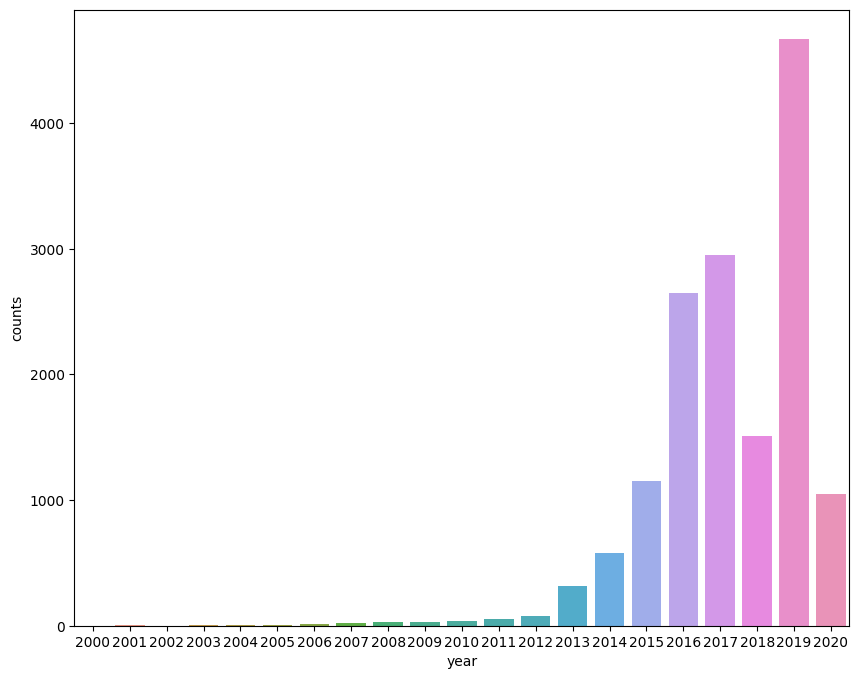

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='counts',data=year_counts)

C:\Users\SANKET DESHMUKH\AppData\Local\Temp\ipykernel_4896\1492679872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"],bins=15)


<AxesSubplot: xlabel='price', ylabel='Density'>

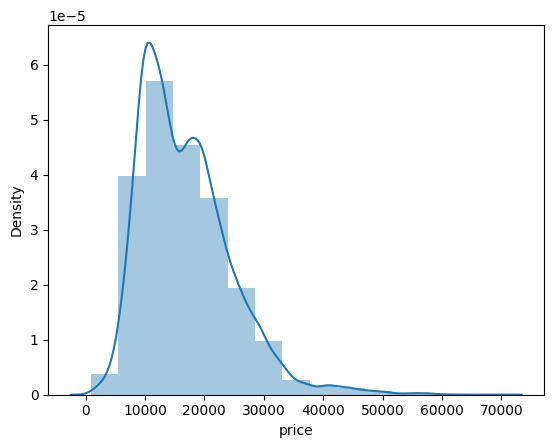

In [12]:
sns.distplot(df["price"],bins=15)

<AxesSubplot: >

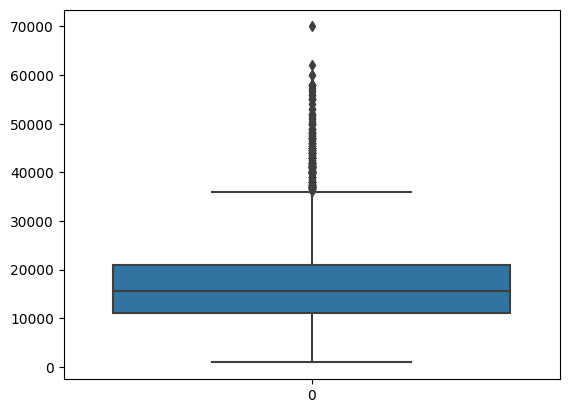

In [13]:
sns.boxplot(df["price"])

In [14]:
# dropping outrange values called as outliers
df[df["price"]>df["price"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
11849,2019,43995,Automatic,2927,Other,150,30.4,2.0,2
13391,2020,47000,Automatic,1001,Diesel,145,33.6,2.0,1
13397,2019,52999,Semi-Auto,3365,Diesel,145,29.4,2.0,2
13401,2019,46795,Semi-Auto,6280,Diesel,145,33.6,2.0,2
13402,2020,43495,Semi-Auto,2000,Diesel,150,33.6,2.0,1
...,...,...,...,...,...,...,...,...,...
15123,2019,57991,Automatic,10288,Diesel,260,33.2,2.0,2
15124,2019,57991,Automatic,6739,Diesel,260,33.2,2.0,2
15125,2019,57991,Automatic,7259,Diesel,260,33.2,2.0,2
15126,2019,57991,Automatic,7486,Diesel,260,33.2,2.0,2


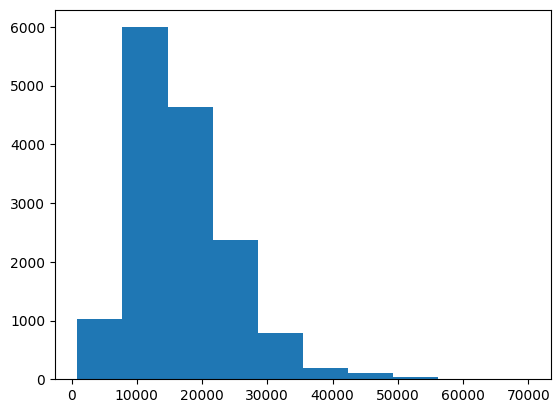

In [15]:
plt.hist(df["price"])
plt.show()

In [16]:
df.transmission.value_counts()

Manual       9417
Semi-Auto    3780
Automatic    1960
Name: transmission, dtype: int64

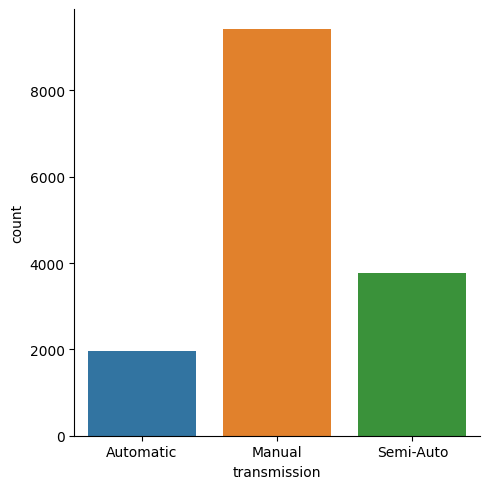

In [17]:
sns.catplot(x='transmission',kind="count",data=df)

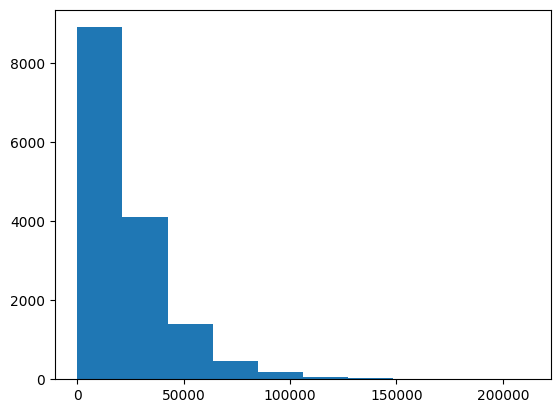

In [18]:
plt.hist(df["mileage"])
plt.show()

<AxesSubplot: >

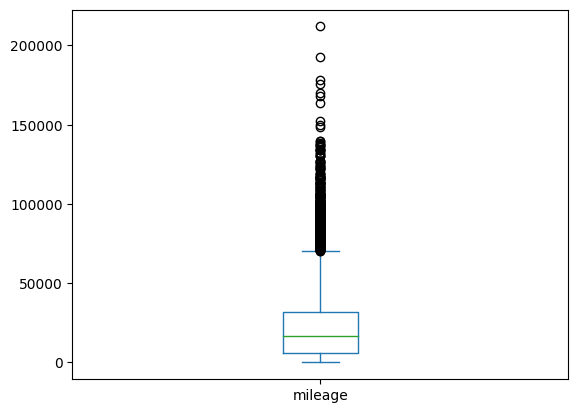

In [19]:
df['mileage'].plot(kind='box')

In [20]:
df[df["mileage"]>df["mileage"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
761,2010,4995,Manual,99000,Diesel,125,57.6,2.0,11
774,2004,1287,Manual,170000,Diesel,165,52.3,2.0,17
787,2013,6999,Manual,100000,Diesel,0,74.3,1.6,8
789,2010,7999,Manual,101000,Diesel,125,57.6,2.0,11
4394,2009,2999,Manual,101702,Diesel,20,68.9,1.6,12
...,...,...,...,...,...,...,...,...,...
15014,2008,2295,Manual,111000,Diesel,155,48.7,2.0,13
15015,2012,3995,Manual,110750,Diesel,20,67.3,1.6,9
15083,2016,8888,Automatic,108808,Diesel,125,58.9,2.0,5
15110,2012,6695,Manual,98000,Diesel,30,60.1,2.0,9


In [21]:
df.fuelType.value_counts()

Petrol    8553
Diesel    6372
Hybrid     145
Other       87
Name: fuelType, dtype: int64

<AxesSubplot: xlabel='count', ylabel='fuelType'>

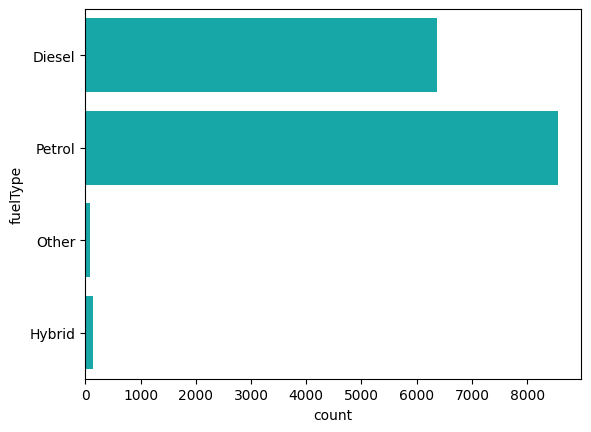

In [22]:
sns.countplot(y='fuelType',data=df,color='c')


C:\Users\SANKET DESHMUKH\AppData\Local\Temp\ipykernel_4896\1936994989.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tax'])


<AxesSubplot: xlabel='tax', ylabel='Density'>

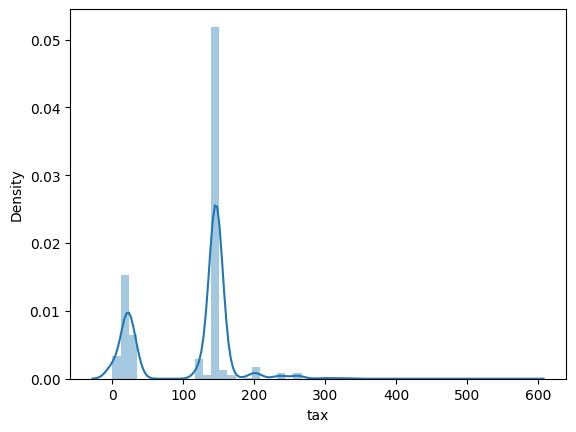

In [23]:
sns.distplot(df['tax'])


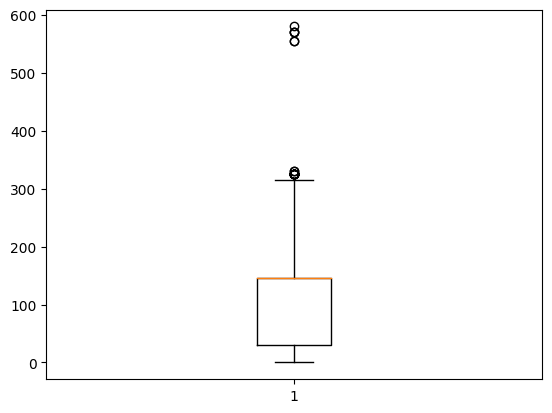

In [24]:
plt.boxplot(df['tax'])
plt.show()

<AxesSubplot: >

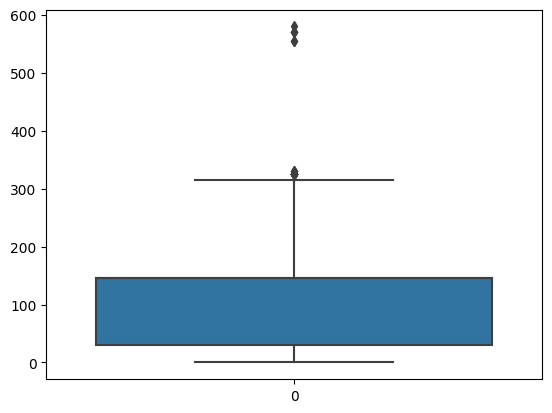

In [25]:
sns.boxplot(df['tax'])

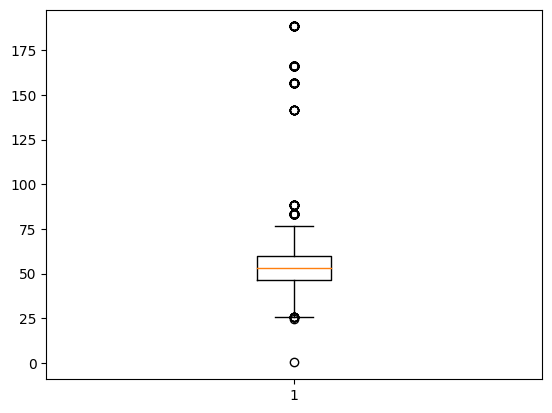

In [26]:
plt.boxplot(df['mpg'])
plt.show()

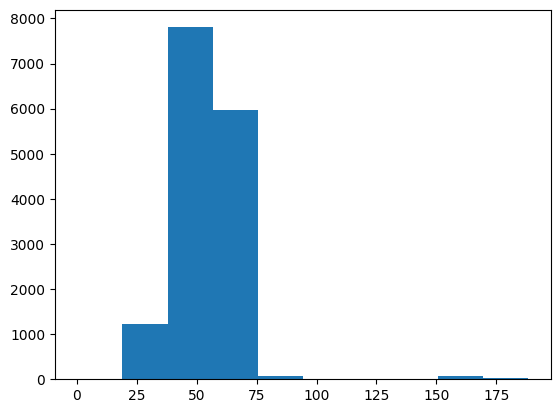

In [27]:
plt.hist(df["mpg"],bins=10)
plt.show()

<AxesSubplot: >

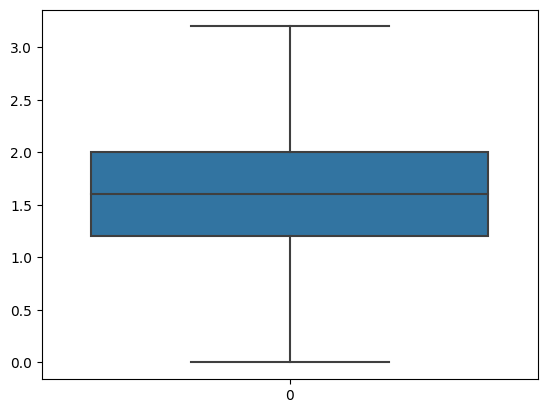

In [28]:
sns.boxplot(df['engineSize'])


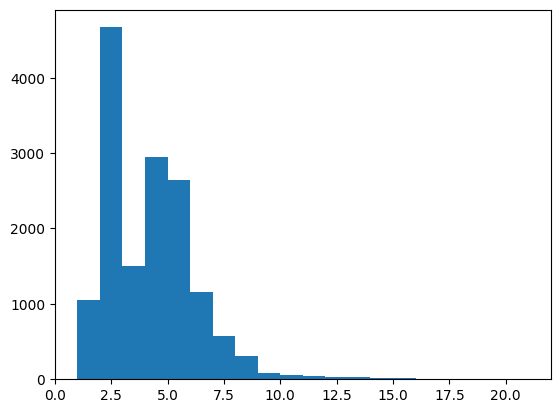

In [29]:
plt.hist(df['car_age'],bins=20)
plt.show()

<AxesSubplot: >

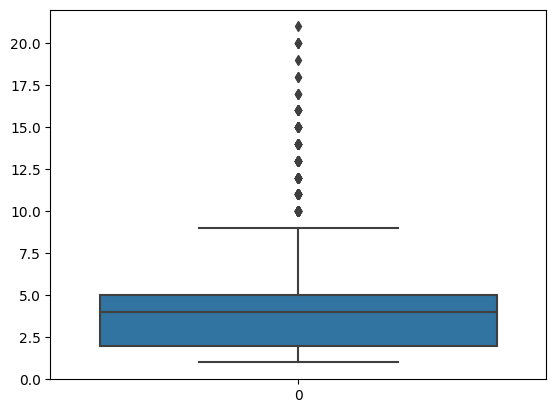

In [30]:
sns.boxplot(df['car_age'])

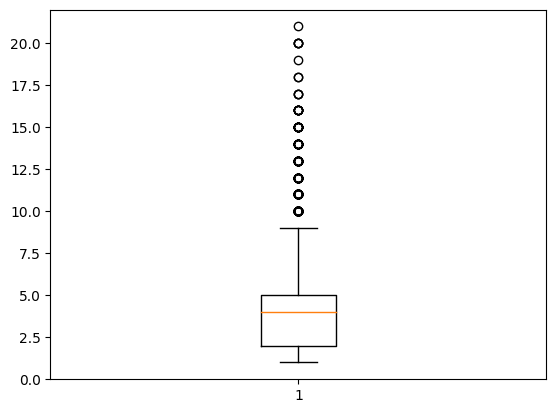

In [31]:
plt.boxplot(df['car_age'])
plt.show()

In [32]:
df = df.drop(['year'],axis=1)
df.head()

,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
0,25000,Automatic,13904,Diesel,145,49.6,2.0,2
1,26883,Automatic,4562,Diesel,145,49.6,2.0,2
2,20000,Manual,7414,Diesel,145,50.4,2.0,2
3,33492,Automatic,4825,Petrol,145,32.5,2.0,2
4,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,2


In [33]:
df.shape

(15157, 8)

In [34]:
df = df.replace({'Automatic': 0, 'Manual': 1, 'Semi-Auto': 2})

df = df.replace({'Diesel': 0, 'Petrol': 1, 'Hybrid': 2, 'Other': 3})

<AxesSubplot: >

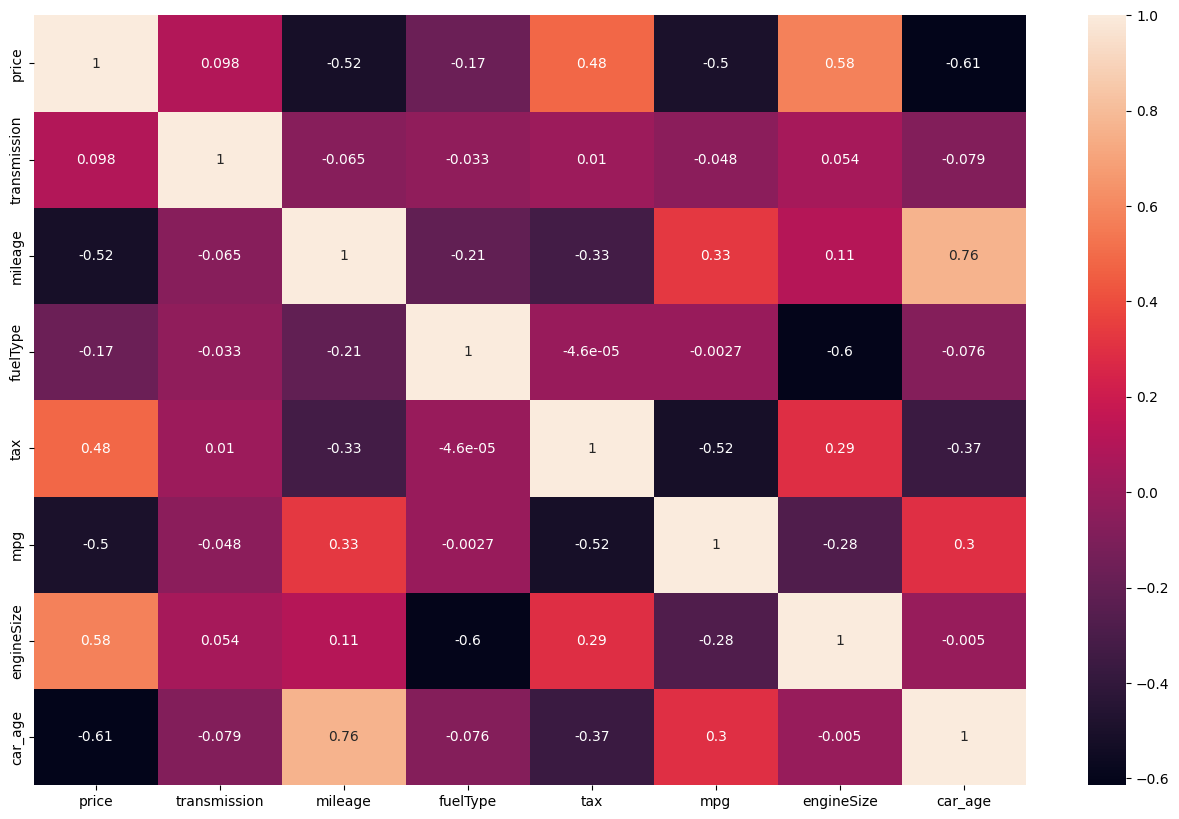

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

## Splitting target and independent columns

In [36]:
X=df.drop(["price"],axis=1)
X.head()

y = df["price"]
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
15152     5990
15153     1799
15154     1590
15155     1250
15156     2295
Name: price, Length: 15157, dtype: int64

In [37]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape, X_test.shape

((12125, 7), (3032, 7))

## LINEAR REGRESSION

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
# for training dataset
lin_reg.score(X_train,y_train)

# for testing dataset
lin_reg.score(X_test,y_test)

0.7591675254865652

In [40]:
lin_reg_predict = lin_reg.predict(X_test)

In [41]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,lin_reg_predict))
print("MSE:", mean_squared_error(y_test,lin_reg_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,lin_reg_predict)))

MAE: 2465.5258059238345
MSE: 14291420.685531324
RMSE: 3780.3995404627967


In [42]:
print("Linear Regression accuracy : ",r2_score(y_test,lin_reg_predict))

Linear Regression accuracy :  0.7591675254865652


## RANDOM FOREST REGRESSOR

In [43]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
rfr.score(X_train,y_train)

rfr.score(X_test,y_test)

0.9373704565969114

In [45]:
rfr_predict = rfr.predict(X_test)

In [46]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,rfr_predict))
print("MSE:", mean_squared_error(y_test,rfr_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rfr_predict)))

MAE: 1229.9913326600574
MSE: 3716546.75692979
RMSE: 1927.8347327843717


In [47]:
print("Random Forest Regression accuracy : ",r2_score(y_test,rfr_predict))

Random Forest Regression accuracy :  0.9373704565969114


## XG BOOST

In [48]:
xgboost = xgb.XGBRegressor(random_state=1,learning_rate=0.1)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [49]:
xgboost.score(X_test,y_test)

xgboost.score(X_train,y_train)

0.954225202742357

In [50]:
xgb_predict = xgboost.predict(X_test)

In [51]:
# checking error rate
print("MAE:", mean_absolute_error(y_test,xgb_predict))
print("MSE:", mean_squared_error(y_test,xgb_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb_predict)))

MAE: 1276.4210650360992
MSE: 3694448.4925450613
RMSE: 1922.0948188226982


In [52]:
print("XG BOOST Regression accuracy : ",r2_score(y_test,xgb_predict))

XG BOOST Regression accuracy :  0.9377428464251399


## Bayesian Regression

In [53]:
from sklearn.linear_model import BayesianRidge

In [54]:
model = BayesianRidge()
model.fit(X_train, y_train)

BayesianRidge()

In [55]:
prediction = model.predict(X_test)

In [56]:
# Evaluation of r2 score of the model against the test set
print(f"Bayesian Regression accuracy : {r2_score(y_test, prediction)}")

Bayesian Regression accuracy : 0.7591752811121626


# PICKLE

In [57]:
# Random Forest Reg. Pickle

f = open('rfr.pickle', 'wb')
pickle.dump(rfr, f)
f.close()

In [58]:
# XG Boost Reg. Pickle

f = open('xgboost.pickle', 'wb')
pickle.dump(xgboost, f)
f.close()

## DONE